# The distributions of defect-inducing commits over time in our study

- Our Dataset

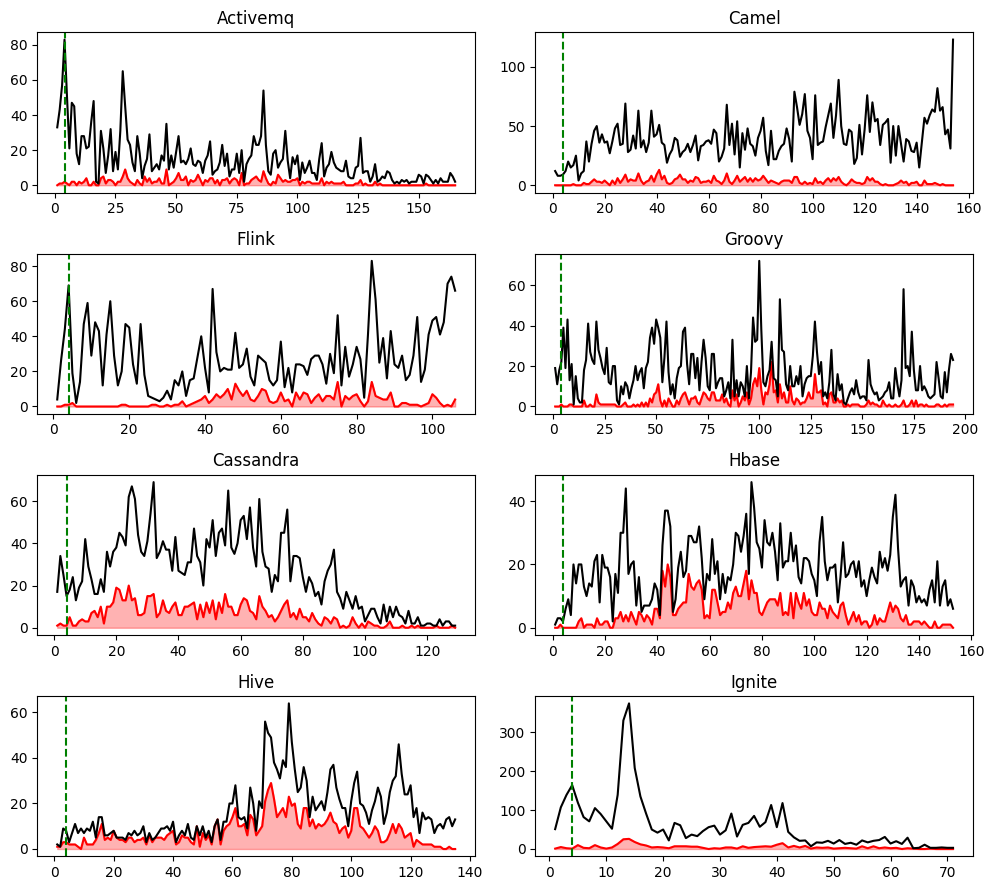

In [7]:
import warnings

import pandas as pd
from environment import PROJECTS

import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)
all_projects_data = []

for project in PROJECTS:
    data = pd.read_csv(f"../data/dataset/combined/{project}.csv")

    data = data.loc[data["project"] == project]
     
    data["date"] = pd.to_datetime(data["date"])
    data = data.set_index(["date"])
    data = data.sort_index()

    monthly_bug_counts = data.resample('M')['buggy'].value_counts().unstack(fill_value=0)
    monthly_bug_counts['total'] = monthly_bug_counts[False] + monthly_bug_counts[True]
    monthly_bug_counts['project'] = project  # 프로젝트 이름 추가
    monthly_bug_counts['month_number'] = range(1, len(monthly_bug_counts) + 1)


    all_projects_data.append(monthly_bug_counts)

num_projects = len(PROJECTS)
cols = 2
rows = (num_projects + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(10, 9))

for i, (project, ax) in enumerate(zip(PROJECTS, axes.flatten())):
    project_data = all_projects_data[i]
    
    ax.plot(project_data['month_number'], project_data[True], color='red')
    ax.fill_between(project_data['month_number'], project_data[True], color='red', alpha=0.3)
    ax.plot(project_data['month_number'], project_data['total'], color='black')
    ax.axvline(x=4, color='green', linestyle='--')
    ax.set_title(project.capitalize())

if num_projects % cols != 0:
    for j in range(num_projects, rows * cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


- ApacheJIT Dataset

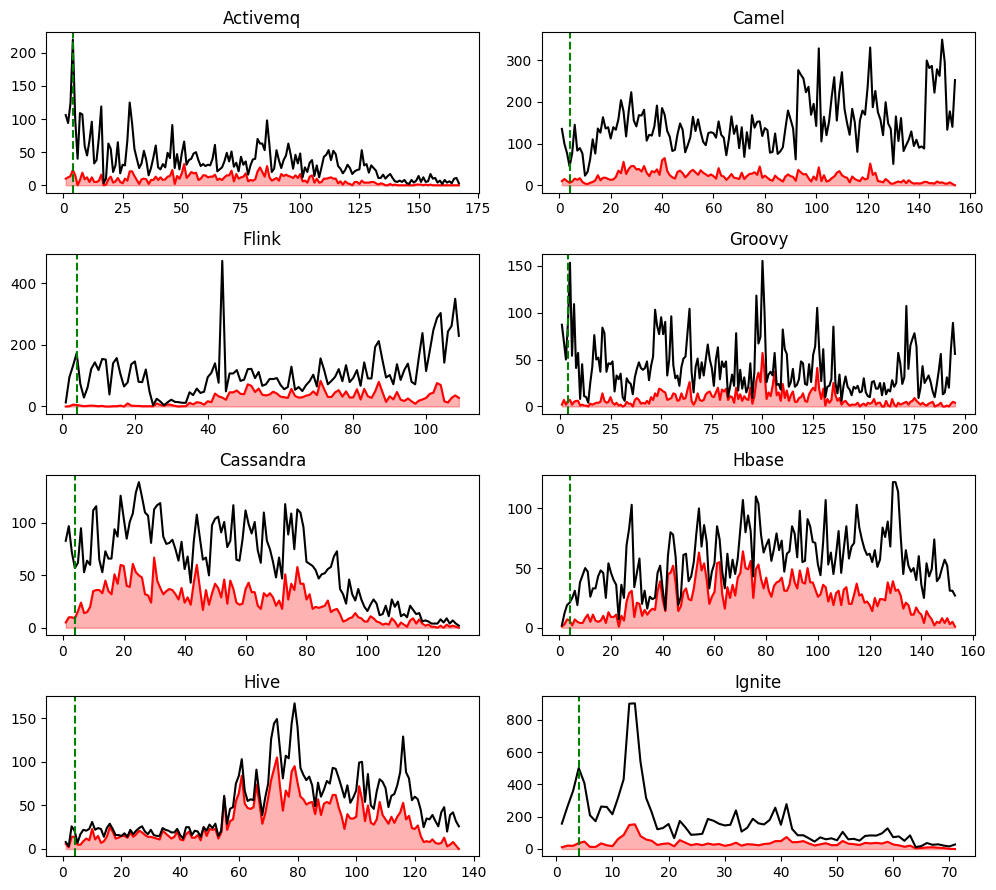

In [8]:
all_projects_data = []

for project in PROJECTS:
    data = pd.read_csv("../data/dataset/apachejit_total.csv")
    data = data.loc[data["project"] == f"apache/{project}"]

    data["date"] = pd.to_datetime(data["author_date"], unit='s')

    data = data.set_index(["date"])
    data = data.sort_index()

    monthly_bug_counts = data.resample('M')['buggy'].value_counts().unstack(fill_value=0)
    monthly_bug_counts['total'] = monthly_bug_counts[False] + monthly_bug_counts[True]
    monthly_bug_counts['project'] = project  # 프로젝트 이름 추가
    monthly_bug_counts['month_number'] = range(1, len(monthly_bug_counts) + 1)


    all_projects_data.append(monthly_bug_counts)

num_projects = len(PROJECTS)
cols = 2
rows = (num_projects + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(10, 9))

for i, (project, ax) in enumerate(zip(PROJECTS, axes.flatten())):
    project_data = all_projects_data[i]
    
    ax.plot(project_data['month_number'], project_data[True], color='red')
    ax.fill_between(project_data['month_number'], project_data[True], color='red', alpha=0.3)
    ax.plot(project_data['month_number'], project_data['total'], color='black')
    ax.axvline(x=4, color='green', linestyle='--')
    ax.set_title(project.capitalize())

if num_projects % cols != 0:
    for j in range(num_projects, rows * cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()
